# Forecasting Based on Models

### Forecast the CocaCola prices data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('CocaCola_Sales_Rawdata.csv')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
df.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [8]:
date=df.Quarter.str.replace(r'(Q\d)_(\d+)',r'19\2-\1')

C:\Users\bhale\AppData\Local\Temp\ipykernel_11244\3833982565.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  date=df.Quarter.str.replace(r'(Q\d)_(\d+)',r'19\2-\1')


In [9]:
df['quarter']=pd.to_datetime(date).dt.strftime('%b-%y')

In [10]:
df.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Jan-86
1,Q2_86,2244.960999,Apr-86
2,Q3_86,2533.804993,Jul-86
3,Q4_86,2154.962997,Oct-86
4,Q1_87,1547.818996,Jan-87


In [11]:
df=df.drop(['Quarter'],axis=1)

In [12]:
df.head()

,Sales,quarter
0,1734.827000,Jan-86
1,2244.960999,Apr-86
2,2533.804993,Jul-86
3,2154.962997,Oct-86
4,1547.818996,Jan-87


In [13]:
df['quarter']=pd.to_datetime(df['quarter'])
df=df.set_index('quarter')
df.head()

,Sales
quarter,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


<AxesSubplot:xlabel='quarter'>

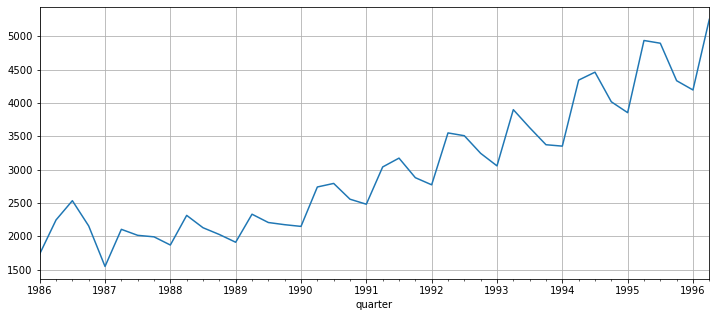

In [14]:
# visualize the data 
df['Sales'].plot(figsize=(12,5),grid=True)

In [15]:
len(df)

42

In [16]:
# split into train and test data with the last  years as test data
train = df.iloc[:len(df)-4]
test = df.iloc[len(df)-4:]

In [17]:
# check the shape of train and test data
train.shape, test.shape

((38, 1), (4, 1))

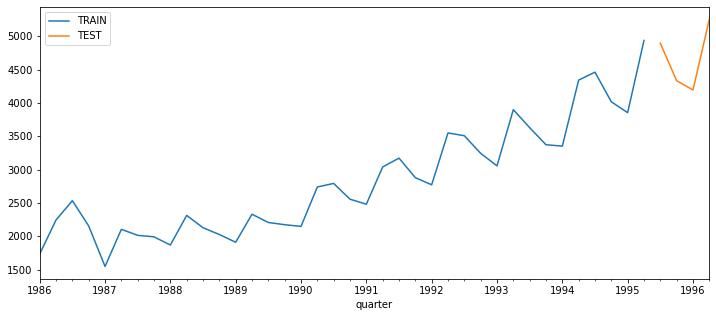

In [18]:
# plot the train and test data in different colors and labels
train['Sales'].plot(legend=True, label='TRAIN', figsize=(12,5))
test['Sales'].plot(legend=True, label='TEST', figsize=(12,5));

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

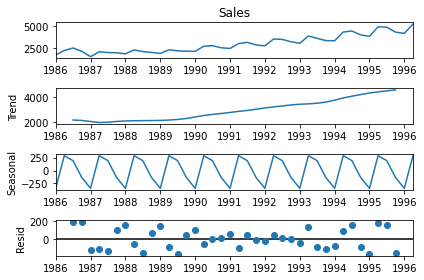

In [20]:
ts_add = seasonal_decompose(df['Sales'],model="additive")
fig = ts_add.plot()
plt.show()

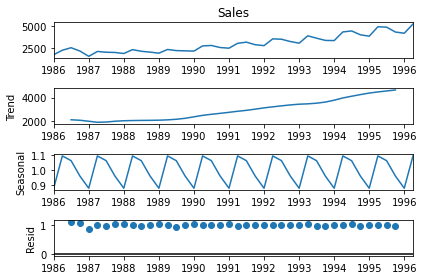

In [21]:
ts_mult=seasonal_decompose(df['Sales'],model='multiplicative')
fig=ts_mult.plot()
plt.show()

In [22]:
import statsmodels.graphics.tsaplots as tsa_plots

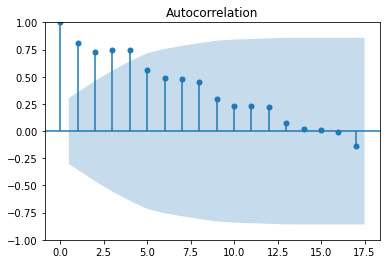

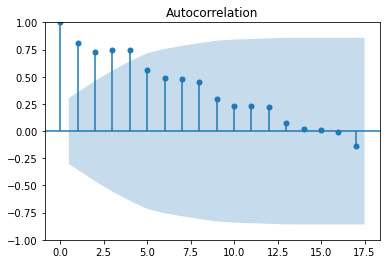

In [23]:
tsa_plots.plot_acf(df['Sales'])

In [24]:
# arima model parameters tuning with auto_arima
from pmdarima import auto_arima

In [25]:
# implement auto_arima to find best parameter in range of 0 to 3 for p & q and d=1
auto_arima_seasonal = auto_arima(train['Sales'], 
                                    start_p=0, start_q=0, 
                                    max_p=3, max_q=3, 
                                    d=1, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=553.800, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=546.027, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=545.356, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=555.167, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=547.243, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=540.789, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=536.106, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=526.449, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=522.489, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=523.095, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=510.137, Time=0.11 sec

Best model:  ARIMA(3,1,2)(0,0,0)[1] inte

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
# fit the model with the identified best parameters
model_312 = ARIMA(train['Sales'], order=(3,1,2))
results_312 = model_312.fit()
forecast_312 = results_312.predict(start=len(train), 
                                    end=len(train)+len(test)-1).rename('ARIMA(3,1,2) Predictions')

C:\Users\bhale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\bhale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\bhale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\bhale\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


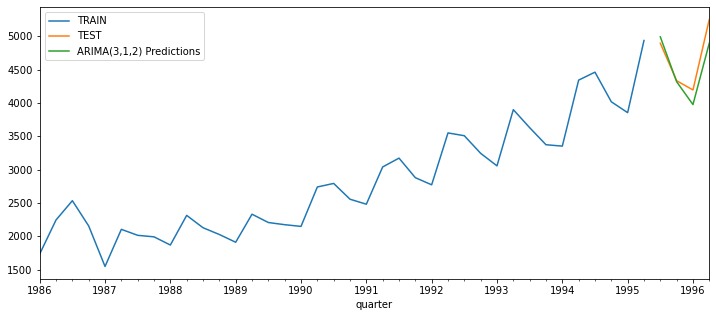

In [28]:
# plot the train,test and forecast data
train['Sales'].plot(legend=True, label='TRAIN', figsize=(12,5))
test['Sales'].plot(legend=True, label='TEST', figsize=(12,5))
forecast_312.plot(legend=True, figsize=(12,5));

In [29]:
forecast_312

1995-07-01    4990.856746
1995-10-01    4317.900231
1996-01-01    3975.110015
1996-04-01    4897.785552
Freq: QS-OCT, Name: ARIMA(3,1,2) Predictions, dtype: float64

In [30]:
df.tail(4)

,Sales
quarter,
1995-07-01,4895.0
1995-10-01,4333.0
1996-01-01,4194.0
1996-04-01,5253.0


In [31]:
from statsmodels.tools.eval_measures import rmse

In [32]:
# caluclate the rmse for the model
rmse_312 = rmse(test['Sales'], forecast_312)
rmse_312

214.18837994929217

In [33]:
test['Sales'].mean()

4668.75

In [34]:
rmse_312*100/test['Sales'].mean()

4.587702917253916

In [35]:
# implement auto_arima to find the best parameters in the range of 2 to 5 for p & q and d=1
auto_arima_model = auto_arima(train['Sales'], seasonal = True, 
           trace = True, error_action = 'ignore', suppress_warnings = True,
           start_p=2,
           start_q=2,
           max_p=5, max_q=5, stepwise=False, d=1, max_d=5, 
           start_P=0, D=1, max_P=5, max_D=5,m=4, start_Q=0, max_Q=5)
# We use m=4 because the dataset in quarter format.

 ARIMA(0,1,0)(0,1,0)[4]             : AIC=438.589, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=439.657, Time=0.03 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=441.492, Time=0.03 sec
 ARIMA(0,1,0)(0,1,3)[4]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,1,4)[4]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,1,5)[4]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=439.844, Time=0.02 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(1,1,2)[4]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(1,1,3)[4]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(1,1,4)[4]             : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=441.786, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(2,1,2)[4]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(2,1,3)[4]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(3,1,0)[4]             : AIC=442.172, Time=0.05 sec


In [36]:
auto_arima_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 1, 0, 4),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

In [37]:
# import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
# fit a SARIMAX model with the above best parameters & forecast the test data
model = SARIMAX(train['Sales'], order=(0, 1, 0), seasonal_order=(0, 1, 0, 4))
results = model.fit()
forecast = results.predict(start=len(train), 
                            end=len(train)+len(test)-1).rename('SARIMA Forecast')
forecast

C:\Users\bhale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\bhale\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


1995-07-01    5055.0
1995-10-01    4611.0
1996-01-01    4448.0
1996-04-01    5530.0
Freq: QS-OCT, Name: SARIMA Forecast, dtype: float64

In [39]:
df.tail(4)

,Sales
quarter,
1995-07-01,4895.0
1995-10-01,4333.0
1996-01-01,4194.0
1996-04-01,5253.0


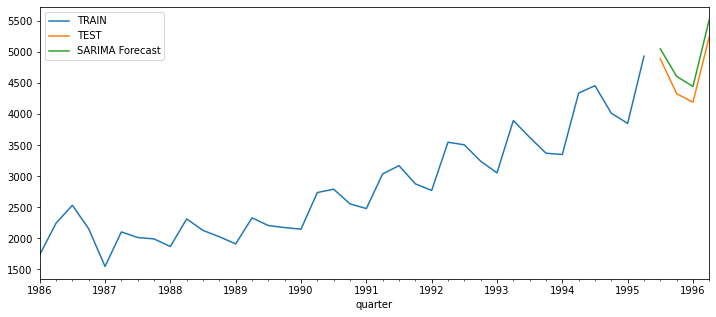

In [40]:
# plot the train, test and forecast data
train['Sales'].plot(legend=True, label='TRAIN', figsize=(12,5))
test['Sales'].plot(legend=True, label='TEST', figsize=(12,5))
forecast.plot(legend=True, figsize=(12,5));

In [41]:
# calculate the rmse for the sarimax model
rmse_sarimax = rmse(test['Sales'], forecast)
rmse_sarimax

247.0470602941881

In [42]:
error=rmse_sarimax*100/test['Sales'].mean()
error

5.291503299473908

#### From the above value of error
#### error=5.29% . is less then 10%, Because of this model is acceptable¶

## Forecasting based on multiple models,like addive ,quadratic,quadratic with additive trend

In [43]:
df=pd.read_csv('CocaCola_Sales_Rawdata.csv')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [44]:
df=pd.get_dummies(df,columns=['Quarter'])

In [45]:
df.head()

,Sales,Quarter_Q1_86,Quarter_Q1_87,Quarter_Q1_88,Quarter_Q1_89,Quarter_Q1_90,Quarter_Q1_91,Quarter_Q1_92,Quarter_Q1_93,Quarter_Q1_94,...,Quarter_Q4_86,Quarter_Q4_87,Quarter_Q4_88,Quarter_Q4_89,Quarter_Q4_90,Quarter_Q4_91,Quarter_Q4_92,Quarter_Q4_93,Quarter_Q4_94,Quarter_Q4_95
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [47]:
df.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
t=np.arange(1,43)

In [49]:
df['t']=t

In [57]:
df['t_sq']=df['t']*df['t']

In [58]:
log_sales=np.log(df['Sales'])
df['log_sales']=log_sales

In [59]:
df.head(43)

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602
5,2104.411995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,36,7.651791
6,2014.362999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,49,7.608058
7,1991.746998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,64,7.596767
8,1869.049999,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,81,7.533186
9,2313.631996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,100,7.746574


In [60]:
# split the dataset into train and test with last 12 months in the test dataset
train=df.iloc[:len(df)-4]
test=df.iloc[len(df)-4:]

In [61]:
test.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_sales
38,4895.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,39,1521,8.495970
39,4333.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,40,1600,8.374015
40,4194.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41,1681,8.341410
41,5253.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42,1764,8.566555


## Forecasting Models

### 1.Linear Regression

In [62]:
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

In [63]:
# fit the linear model on the train dataset with sales as the target variable and t as the feature
model=ols('Sales~t',data=train).fit()

In [64]:
# predict the sales on the test dataset $ compute the RMSE
pred=model.predict(test['t'])
rmse_lin=rmse(test['Sales'],pred)
print('RMSE of Linear Model:',rmse_lin)

RMSE of Linear Model: 591.5532957485534


In [65]:
rmse_lin*100/np.mean(test['Sales'])

12.67048558497571

### 2. Exponential Model

In [66]:
model=ols('log_sales~t',data=train).fit()

In [67]:
# predict the log_sales on the test dataset & compute the RMSE
pred=model.predict(test['t'])
rmse_log=rmse(test['Sales'],np.exp(pred))
print('RMSE of Exponential Model:',rmse_log)

RMSE of Exponential Model: 466.247973132103


In [68]:
rmse_log*100/np.mean(test['Sales'])

9.986569705640761

### 3. Quadratic Model

In [70]:
# fit the model with sales as the target and t, t^2 as the feature
model=ols('Sales~t+I(t**2)',data=train).fit()

In [71]:
# predict the Sales on the test dataset & compute the rmse
pred=model.predict(test[['t','t_sq']])
rmse_quad=rmse(test['Sales'],pred)
print('RMSE of Quadratic Model: ', rmse_quad)

RMSE of Quadratic Model:  475.56183519820405


In [72]:
rmse_quad*100/np.mean(test['Sales'])

10.186063404513073

### 4. Additive Seasonality Model

In [79]:
# fit the model with sales as the target feature and quarters are the feature
model=ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()

In [80]:
# predict the sales on the test dataset & compute the RMSE
pred = model.predict(test[['Q1','Q2','Q3','Q4']])
rmse_additive = rmse(test['Sales'], pred)
print('RMSE of Additive Model: ', rmse_additive)

RMSE of Additive Model:  1969.832041761209


In [81]:
rmse_additive*100/np.mean(test['Sales'])

42.19185096141813

### 5. Quadratic Model With Additive Seasonality

In [82]:
# fit a model with sales as the target and the months as the features
model = ols('Sales ~Q1+Q2+Q3+Q4+t+t_sq',data=train).fit()

In [83]:
# predict the sales on the test dataset & compute the RMSE
pred = model.predict(test[['Q1','Q2','Q3','Q4','t','t_sq']])
rmse_quad__with_additive = rmse(test['Sales'], pred)
print('RMSE of Quadratic with Additive Model: ', rmse_quad__with_additive)

RMSE of Quadratic with Additive Model:  415.1481077341724


In [84]:
rmse_quad__with_additive*100/np.mean(test['Sales'])

8.892061209835019

### 6. Multiplicative Seasonality Model

In [86]:
# fit a model with log_sales as the target with months as the features
model = ols('log_sales~Q1+Q2+Q3+Q4', data=train).fit()

In [88]:
# predict the sales on the test dataset and compute the rmse
pred=model.predict(test[['Q1','Q2','Q3','Q4']])
rmse_multi=rmse(test['Sales'],np.exp(pred))
print('RMSE of Multiplicative Seasonality Model:',rmse_multi)

RMSE of Multiplicative Seasonality Model: 2497.791229872743


In [89]:
rmse_multi*100/np.mean(test['Sales'])

53.5002137589878

### 7.Multiplicative Seasonality with Additive trend

In [90]:
# fit a model with log_sales as the target with months as the features
model = ols('log_sales~Q1+Q2+Q3+Q4+t', data=train).fit() 

In [93]:
# predict the sales on the test dataset and compute the rmse
pred=model.predict(test[['Q1','Q2','Q3','Q4','t']])
rmse_multi_with_additive=rmse(test['Sales'],np.exp(pred))
print('RMSE of Multiplicative Model with additive trend:',rmse_multi_with_additive)

RMSE of Multiplicative Model with additive trend: 2204.162785426985


In [94]:
rmse_multi_with_additive*100/np.mean(test['Sales'])

47.210983355865814

# Model comparison

In [97]:
# compare the RMSE of all the models in a dataframe 
rmse_df=pd.DataFrame({'Model':['Linear',
                              'Exponential',
                              'Quadratic',
                              'Additive',
                              'Quadratic Model with Additive Seasonality',
                              'Multiplicative Model',
                              'Multiplicative Model with Additive Trend'],
                     'RMSE':[rmse_lin,
                            rmse_log,
                            rmse_quad,
                            rmse_additive,
                            rmse_quad__with_additive,
                            rmse_multi,
                            rmse_multi_with_additive]})
rmse_df

,Model,RMSE
0,Linear,591.553296
1,Exponential,466.247973
2,Quadratic,475.561835
3,Additive,1969.832042
4,Quadratic Model with Additive Seasonality,415.148108
5,Multiplicative Model,2497.791230
6,Multiplicative Model with Additive Trend,2204.162785


In [98]:
# sort the dataframe by RMSE in descending order
rmse_df.sort_values(by='RMSE', ascending=True)

,Model,RMSE
4,Quadratic Model with Additive Seasonality,415.148108
1,Exponential,466.247973
2,Quadratic,475.561835
0,Linear,591.553296
3,Additive,1969.832042
6,Multiplicative Model with Additive Trend,2204.162785
5,Multiplicative Model,2497.791230


#### From the above Dataframe we select the Quadratic Model with Additive trend because it has best RMSE value